In [ ]:
!which python

/opt/anaconda3/bin/python


In [ ]:
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
at200 = pd.read_csv("../data/csv_files/at200.csv")
at500 = pd.read_csv("../data/csv_files/at500.csv")
vulink = pd.read_csv("../data/csv_files/vulink.csv")

## pH (pH) vs pH MV (mV)

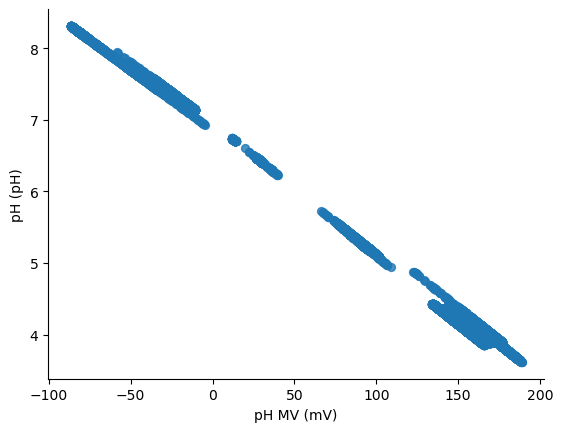

In [ ]:
at200.plot(kind='scatter', x='pH MV (mV)', y='pH (pH)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

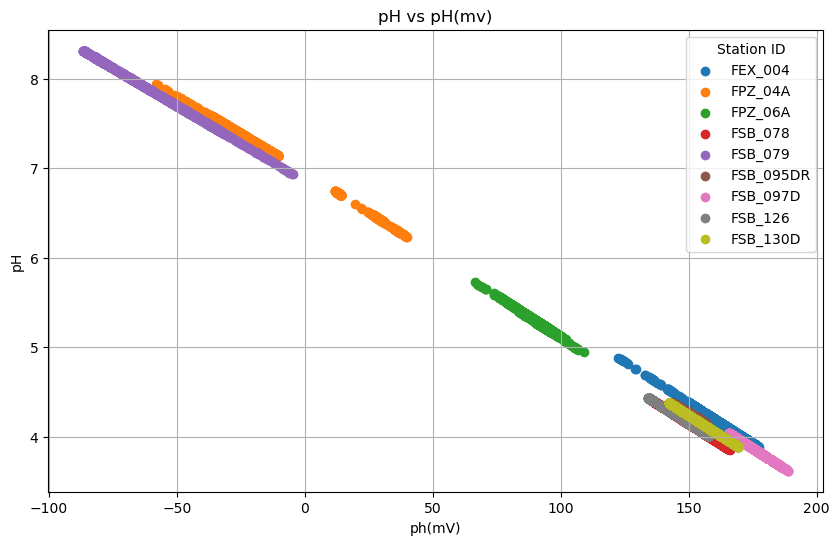

In [ ]:
at200_groups = at200.groupby("station_id")
plt.figure(figsize=(10, 6))
for station, group in at200_groups:
    plt.scatter(group['pH MV (mV)'], group['pH (pH)'], label=station)
plt.title('pH vs pH(mv)')
plt.xlabel('ph(mV)')
plt.ylabel('pH')
plt.legend(loc = 'upper right', title='Station ID')
plt.grid(True)
plt.show()

## Total Dissolved Solids (mg/L) vs pH (pH)

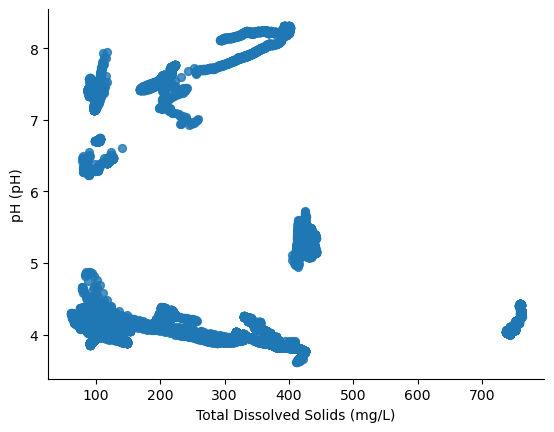

In [ ]:
at200.plot(kind='scatter', x='Total Dissolved Solids (mg/L)', y='pH (pH)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

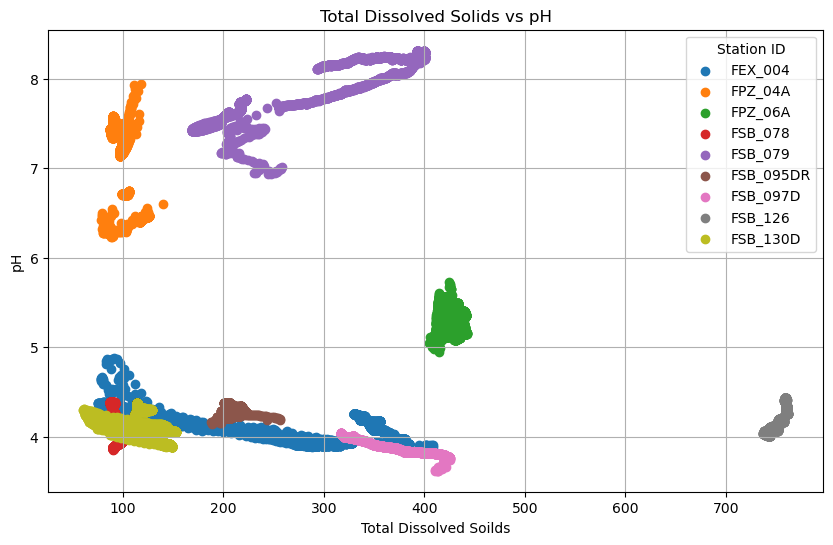

In [ ]:
plt.figure(figsize=(10, 6))
for station, group in at200_groups:
    plt.scatter(group['Total Dissolved Solids (mg/L)'], group['pH (pH)'], label=station)
plt.title('Total Dissolved Solids vs pH')
plt.xlabel('Total Dissolved Soilds')
plt.ylabel('pH')
plt.legend(loc = 'upper right', title='Station ID')
plt.grid(True)
plt.show()

## pH MV (mV) vs % Saturation O₂ (% sat)

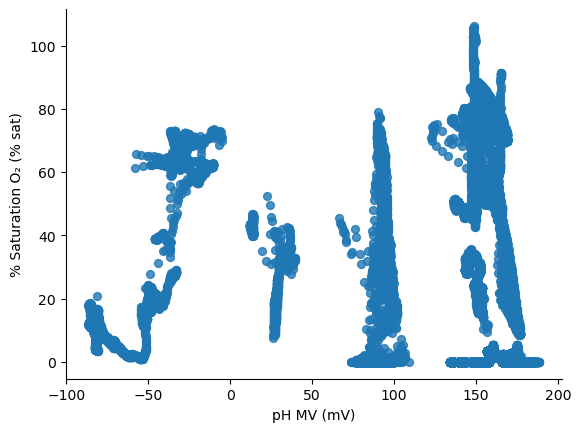

In [ ]:
# @title pH MV (mV) vs % Saturation O₂ (% sat)

from matplotlib import pyplot as plt
at200.plot(kind='scatter', x='pH MV (mV)', y='% Saturation O₂ (% sat)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

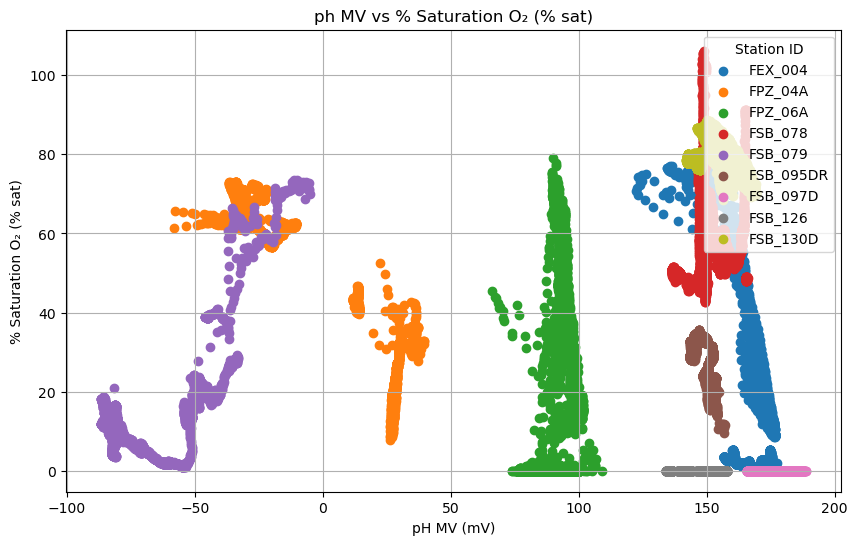

In [ ]:
plt.figure(figsize=(10, 6))
for station, group in at200_groups:
    plt.scatter(group['pH MV (mV)'], group['% Saturation O₂ (% sat)'], label=station)
plt.title('ph MV vs % Saturation O₂ (% sat)')
plt.xlabel('pH MV (mV)')
plt.ylabel('% Saturation O₂ (% sat)')
plt.legend(loc = 'upper right', title='Station ID')
plt.grid(True)
plt.show()

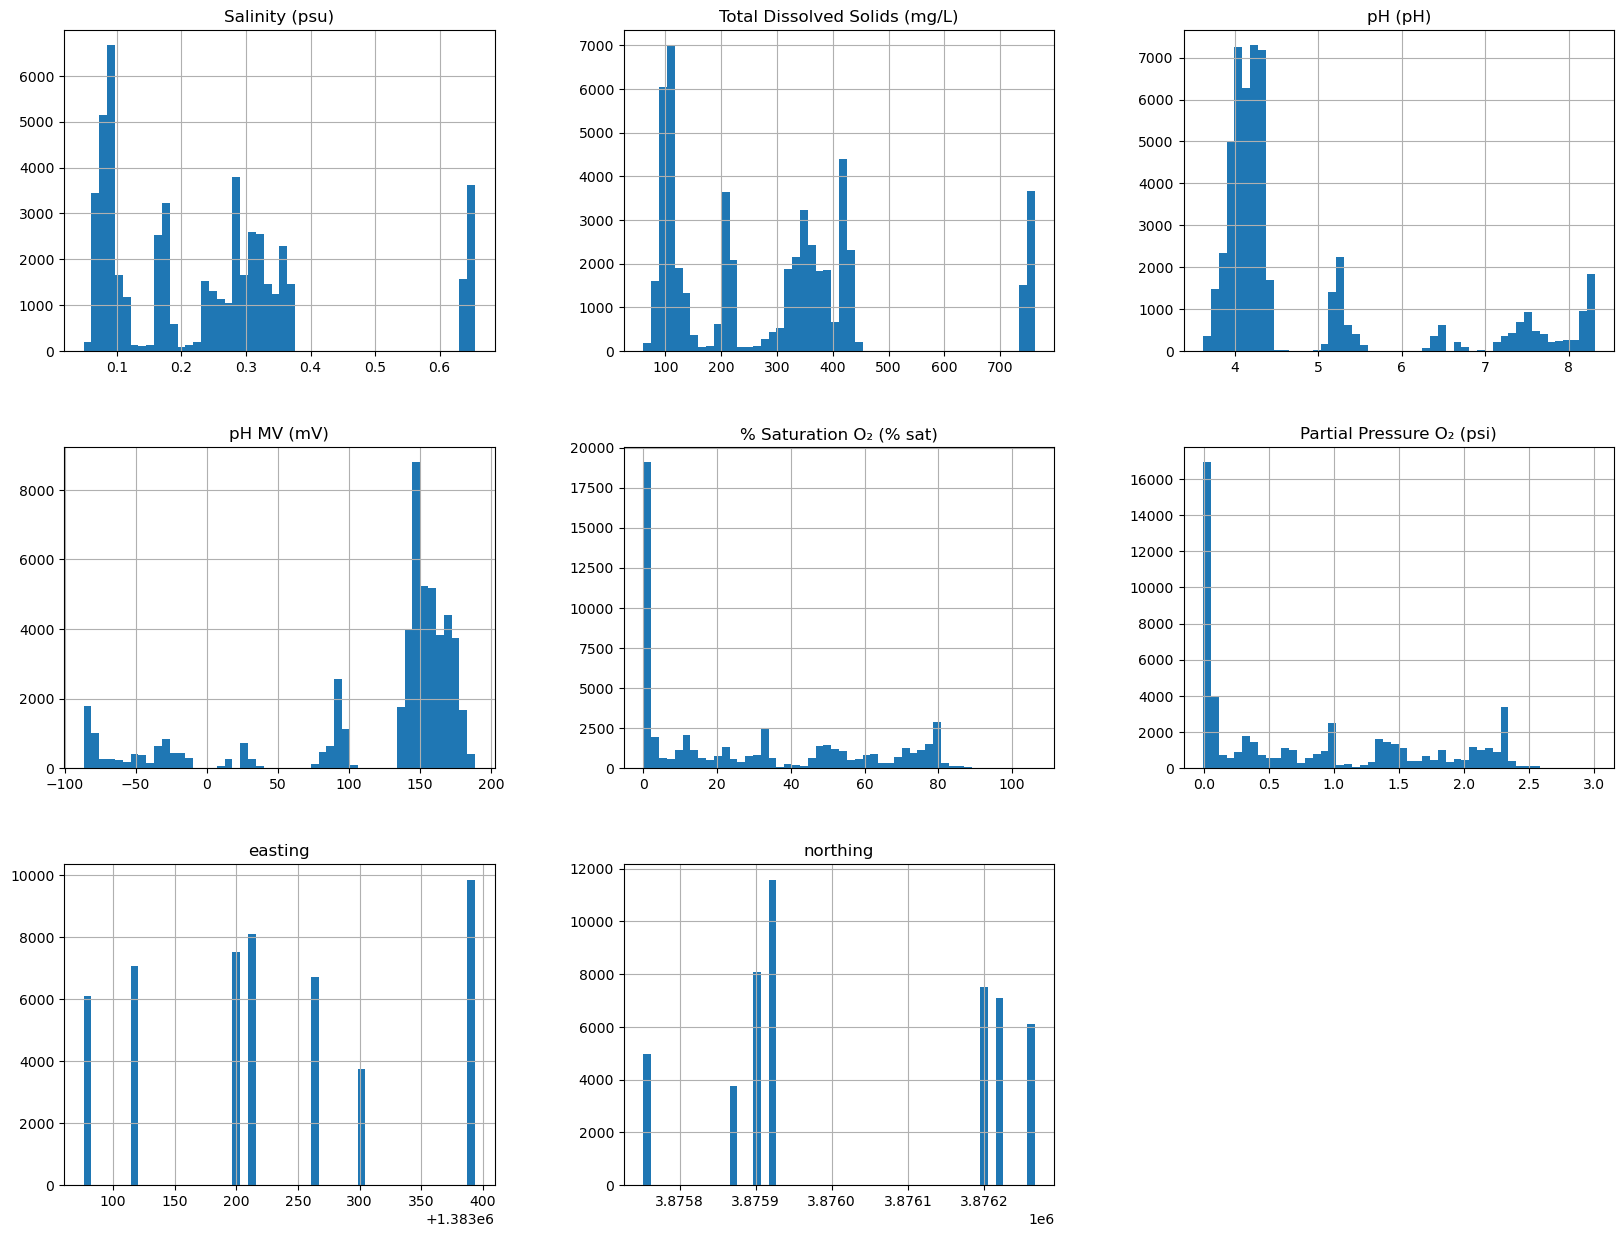

In [ ]:
at200.hist(bins = 50, figsize = (20, 15))
plt.show()

## Salinity vs total dissolved solids

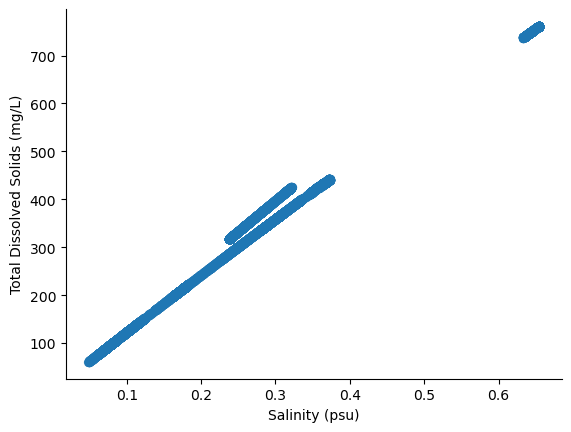

In [ ]:
at200.plot(kind='scatter', x='Salinity (psu)', y='Total Dissolved Solids (mg/L)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

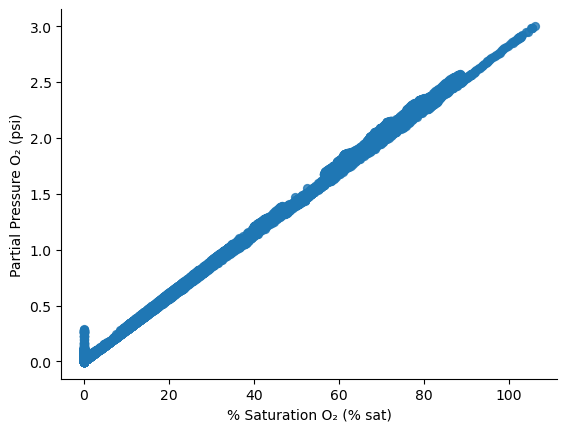

In [ ]:
at200.plot(kind='scatter', x='% Saturation O₂ (% sat)', y='Partial Pressure O₂ (psi)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

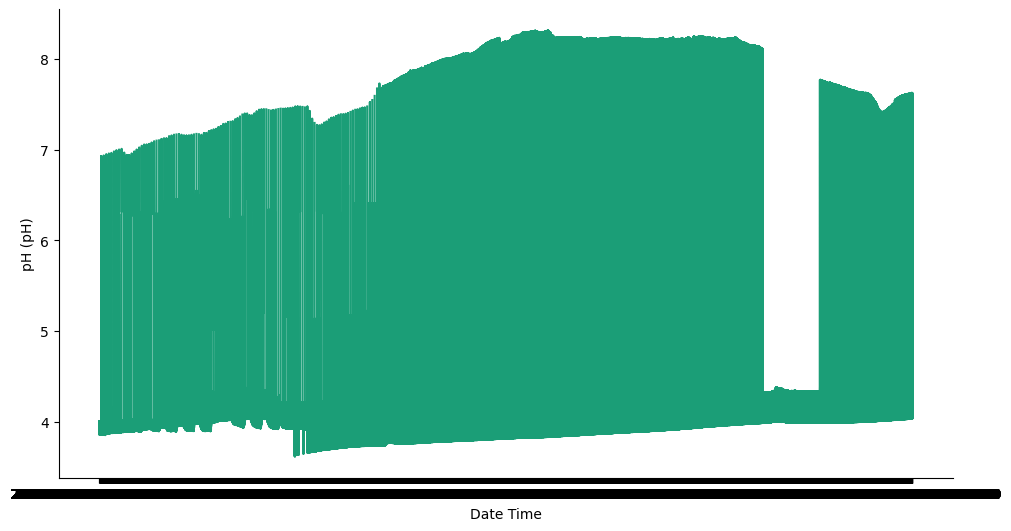

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date Time']
  ys = series['pH (pH)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = at200.sort_values('Date Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date Time')
_ = plt.ylabel('pH (pH)')

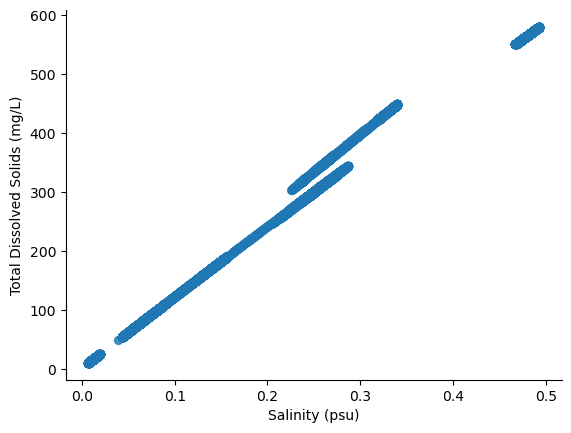

In [ ]:
at500.plot(kind='scatter', x='Salinity (psu)', y='Total Dissolved Solids (mg/L)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_at200 = pd.merge(at200, vulink, on = ["Date Time", "station_id"])

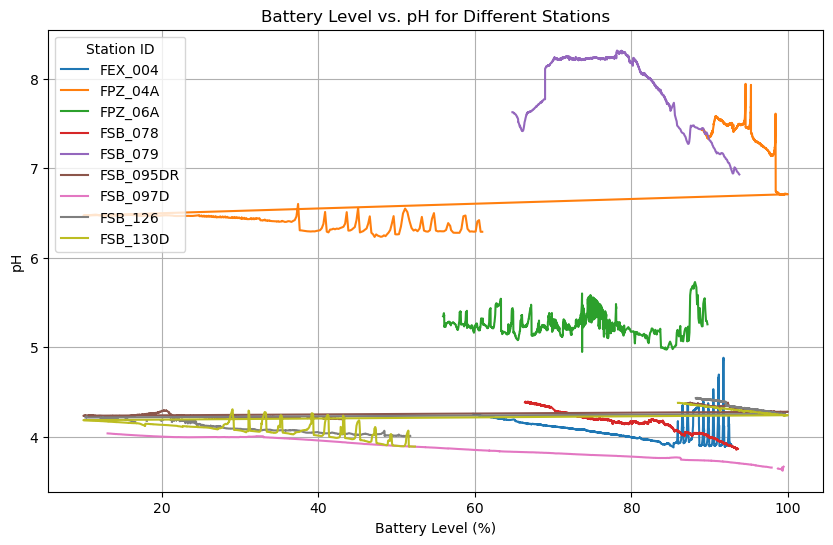

In [ ]:
at200_groups = merged_at200.groupby("station_id")
plt.figure(figsize=(10, 6))
for station, group in at200_groups:
    plt.plot(group['Battery Level (%)'], group['pH (pH)'], label=station)
plt.title('Battery Level vs. pH for Different Stations')
plt.xlabel('Battery Level (%)')
plt.ylabel('pH')
plt.legend(loc = 'upper left', title='Station ID')
plt.grid(True)
plt.show()

In [ ]:
print(at500['station_id'].unique())
print(at200['station_id'].unique())

['FSB_138D' 'FPZ_06B' 'FSB_108D' 'FSB_132D' 'FSB_124D' 'FPZ_08AR'
 'FSB_127D' 'FSB_091D' 'FSB_128D' 'FSB_116D' 'FSB_118D' 'FSB_099D'
 'FSP_204A' 'FSB_114D' 'FSB_120D']
['FSB_079' 'FSB_097D' 'FSB_095DR' 'FPZ_04A' 'FSB_126' 'FPZ_06A' 'FEX_004'
 'FSB_078' 'FSB_130D']


In [ ]:
at200

,Date Time,Salinity (psu),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),% Saturation O₂ (% sat),Partial Pressure O₂ (psi),station_id,easting,northing
0,2023-04-02 00:00:00.000,0.201872,244.631425,6.929066,-4.856586,69.912140,1.956854,FSB_079,1383390.230,3875920.350
1,2023-04-03 00:00:00.000,0.204212,247.394398,6.935868,-5.230904,71.173958,2.002873,FSB_079,1383390.230,3875920.350
2,2023-04-04 00:00:00.000,0.207248,250.975549,6.950644,-6.043911,71.184135,2.003345,FSB_079,1383390.230,3875920.350
3,2023-04-05 00:00:00.000,0.208961,252.996534,6.955452,-6.308556,71.814392,2.026240,FSB_079,1383390.230,3875920.350
4,2023-04-06 00:00:00.000,0.208753,252.752602,6.964334,-6.797314,71.640572,2.025629,FSB_079,1383390.230,3875920.350
...,...,...,...,...,...,...,...,...,...,...
54338,2024-03-03 01:00:00.000,0.092416,114.033416,4.379131,142.171387,78.567627,2.295832,FSB_130D,1383264.637,3875923.874
54339,2024-03-03 02:00:00.000,0.092410,114.026435,4.379527,142.149933,78.623016,2.297134,FSB_130D,1383264.637,3875923.874
54340,2024-03-03 03:00:00.000,0.092427,114.046119,4.378487,142.207153,78.544373,2.295974,FSB_130D,1383264.637,3875923.874
54341,2024-03-03 04:00:00.000,0.092430,114.050336,4.378838,142.188080,78.561623,2.296732,FSB_130D,1383264.637,3875923.874
